In [0]:
pip install tweepy

In [0]:
pip install beautifulsoup4

In [0]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [0]:
consumer_key= 'E5CnblXnaItHAclqBSJvuO8Y9'
consumer_secret= 'uayOQCLvEcjuGabfpGFIrKi9sqXgP219MCXMtzjowmUqSPl4Xl'
access_token= '482072796-uQVOCqqWoepMmfBM62QpFhOVM7djaOS8ZMKqRNVA'
access_token_secret= 'daczZiP86sN2RK294YxX4r94v6jrez1cuvviUQ5W2j8qd'

In [0]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
# define the search words and date since
search_words = ["#foodsecurity", '#UHC', 'big four agenda','#affordablehousing',
                '#manufacturing','#BigFourAgenda','#Big4Agenda',
                '#YouthandThebigfour']
date_since = "2019-3-11"

In [0]:
 # Create a function to remove URL''s from the tweets
  def remove_url(txt):
    # Replace URLs found in a text string with nothing 
#     (i.e. it will remove the URL from the string).

#     Parameters
#     ----------
#     txt : string
#         A text string that you want to parse and remove urls.

#     Returns
#     -------
#     The same txt string with url's removed.

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [0]:
Our_tweets = []
for search_word in search_words:
  new_search = search_word + " -filter:retweets"
  tweets = tw.Cursor(api.search,
                  q=new_search,
                  lang="en",
                   since=date_since).items(100)
  Our_tweets.append(tweets)
Our_tweets

In [0]:
users_locs=[]
all_split_tweets=[]
for tweets in Our_tweets:
  for tweet in tweets:
    if tweet.user.location == 'Nairobi' or tweet.user.location == 'Mombasa':
      tweets_no_url = remove_url(tweet.text)
      all_split_tweets.append(tweets_no_url.lower().split())
      users_locs.append([tweet.user.screen_name, tweet.user.location, tweets_no_url])

users_locs 
# all_split_tweets

[['susan_mochache',
  'Nairobi',
  'Free maternal health services under the UHC pilot phase has increased the number of hospital deliveries at the Ma'],
 ['susan_mochache',
  'Nairobi',
  'machakoscounty residents can now access free mammography radiology and other diagnostic services since the launch'],
 ['susan_mochache',
  'Nairobi',
  'machakoscounty was chosen as a UHC pilot county due to high number of traffic accidents along the Nairobi Momba'],
 ['susan_mochache',
  'Nairobi',
  'We are received machakoscounty by Deputy Governor FrancisMaliti Machakos is one of the UHC pilot counties'],
 ['susan_mochache',
  'Nairobi',
  'Visiting Athi River Health Centre with Thailand Public Health Minister Prof Emeritus Dr PiyasakolThailand is coop'],
 ['KenyanTraffic',
  'Nairobi',
  '1139 MAJOR ROAD INFRASTRUCTURE DEVELOPMENT PROJECTS ENABLING ATTAINMENT OF BIG FOUR AGENDA PDUDelivery'],
 ['ntvkenya',
  'Nairobi',
  'David Osiany Isnt this the government has food security as part of their b

In [0]:

df = pd.DataFrame(data=users_locs,
                 columns=['User', 'Location', 'Tweet'])
df

,User,Location,Tweet
0,susan_mochache,Nairobi,Free maternal health services under the UHC pi...
1,susan_mochache,Nairobi,machakoscounty residents can now access free m...
2,susan_mochache,Nairobi,machakoscounty was chosen as a UHC pilot count...
3,susan_mochache,Nairobi,We are received machakoscounty by Deputy Gover...
4,susan_mochache,Nairobi,Visiting Athi River Health Centre with Thailan...
5,KenyanTraffic,Nairobi,1139 MAJOR ROAD INFRASTRUCTURE DEVELOPMENT PRO...
6,ntvkenya,Nairobi,David Osiany Isnt this the government has food...
7,Ademba_Rocco,Nairobi,The war on corruption is a sure bet in promoti...
8,MarkOmbima,Nairobi,JKLive Whenever UNCTADKituyi speaksI listen ke...
9,babuowiono,Nairobi,fellow Kenyans its high time we join hands and...


In [0]:
df.head()

,User,Location,Tweet
0,susan_mochache,Nairobi,Free maternal health services under the UHC pi...
1,susan_mochache,Nairobi,machakoscounty residents can now access free m...
2,susan_mochache,Nairobi,machakoscounty was chosen as a UHC pilot count...
3,susan_mochache,Nairobi,We are received machakoscounty by Deputy Gover...
4,susan_mochache,Nairobi,Visiting Athi River Health Centre with Thailan...


In [0]:
df.info()
# there are no null values in our dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
User        19 non-null object
Location    19 non-null object
Tweet       19 non-null object
dtypes: object(3)
memory usage: 536.0+ bytes


In [0]:
df.describe()

,User,Location,Tweet
count,19,19,19
unique,14,1,19
top,susan_mochache,Nairobi,Visiting Athi River Health Centre with Thailan...
freq,5,19,1


In [0]:
# list of all words across tweets
all_tweets_no_url = list(itertools.chain(*all_split_tweets))

# create a counter
counts_no_url = collections.Counter(all_tweets_no_url)

counts_no_url.most_common(15)


[('the', 17),
 ('of', 10),
 ('to', 8),
 ('is', 8),
 ('health', 6),
 ('and', 6),
 ('we', 6),
 ('in', 6),
 ('a', 5),
 ('big', 5),
 ('big4agenda', 5),
 ('as', 4),
 ('are', 4),
 ('with', 4),
 ('four', 4)]

In [0]:
# based on the counter, you can create a dataframe for analysis and plotting to view the most common words
frequent_words_df = pd.DataFrame(counts_no_url.most_common(15),
                                columns=['words', 'count']
                                )
frequent_words_df

,words,count
0,the,17
1,of,10
2,to,8
3,is,8
4,health,6
5,and,6
6,we,6
7,in,6
8,a,5
9,big,5


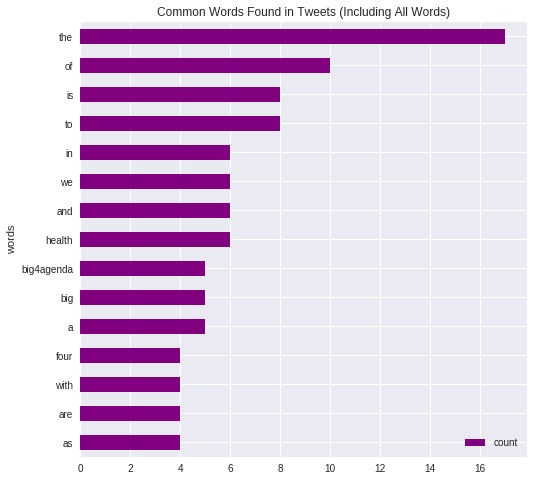

In [0]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
frequent_words_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [0]:
# remove stopword with nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

# notice that the stopwords given by nltk are lowercase.

['yours',
 'very',
 'his',
 'those',
 'will',
 "won't",
 'to',
 'theirs',
 'couldn',
 'haven']

In [0]:
# remove stopwords from each lists of words

tweets_no_sw = [[word for word in words if not word in stop_words]
                       for words in all_split_tweets]

tweets_no_sw

[['free',
  'maternal',
  'health',
  'services',
  'uhc',
  'pilot',
  'phase',
  'increased',
  'number',
  'hospital',
  'deliveries'],
 ['machakoscounty',
  'residents',
  'access',
  'free',
  'mammography',
  'radiology',
  'diagnostic',
  'services',
  'since',
  'launch'],
 ['machakoscounty',
  'chosen',
  'uhc',
  'pilot',
  'county',
  'due',
  'high',
  'number',
  'traffic',
  'accidents',
  'along',
  'nairobi',
  'momba'],
 ['received',
  'machakoscounty',
  'deputy',
  'governor',
  'francismaliti',
  'machakos',
  'one',
  'uhc',
  'pilot',
  'counties'],
 ['visiting',
  'athi',
  'river',
  'health',
  'centre',
  'thailand',
  'public',
  'health',
  'minister',
  'prof',
  'emeritus',
  'dr',
  'piyasakolthailand',
  'coop'],
 ['1139',
  'major',
  'road',
  'infrastructure',
  'development',
  'projects',
  'enabling',
  'attainment',
  'big',
  'four',
  'agenda',
  'pdudelivery'],
 ['david',
  'osiany',
  'isnt',
  'government',
  'food',
  'security',
  'part',
 

In [0]:
# Create a counter of words to find the most commonly used and number of times used
all_tweets_no_sw = list(itertools.chain(*tweets_no_sw))

counts_no_sw = collections.Counter(all_tweets_no_sw)

counts_no_sw.most_common(15)

[('health', 6),
 ('big', 5),
 ('big4agenda', 5),
 ('four', 4),
 ('agenda', 4),
 ('uhc', 3),
 ('pilot', 3),
 ('machakoscounty', 3),
 ('county', 3),
 ('free', 2),
 ('services', 2),
 ('number', 2),
 ('residents', 2),
 ('since', 2),
 ('high', 2)]

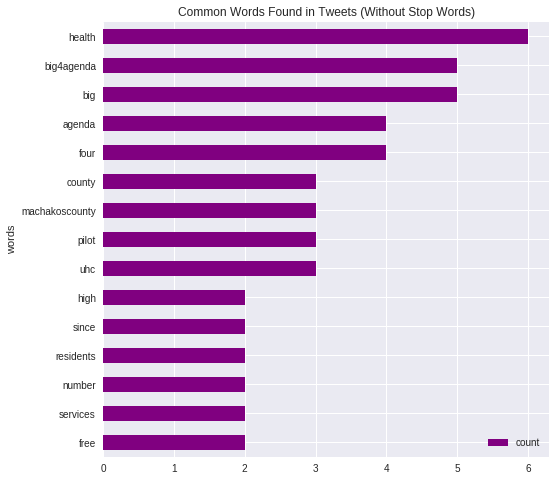

In [0]:
# create a DataFrame and plot word frequencies without stop words
no_sw_df = pd.DataFrame(counts_no_sw.most_common(15),
                       columns=['words', 'count']
                       )

# no_sw_df

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
no_sw_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [0]:
# Create textblob objects of the tweets

sentiment_list=[]
for tweets in tweets_no_sw:
  #print(tweets)
  sentiment_obj = [TextBlob(tweet)for tweet in tweets]
  #print(sentiment_obj)
  
  print(sentiment_obj[0].polarity, sentiment_obj[0])
  #break
  sentiment_object = sentiment_obj[0].polarity, sentiment_obj[0]
  
  sentiment_list.append(sentiment_object)
sentiment_list

0.4 free
0.0 machakoscounty
0.0 machakoscounty
0.0 received
0.0 visiting
0.0 1139
0.0 david
0.0 war
0.0 jklive
0.0 fellow
0.0 corruption
0.0 unctadkituyi
0.0 president
0.0 big4agenda
0.0 community
0.0 roadmap
0.0 wmnjoya
0.0 big
0.0 contribute


[(0.4, TextBlob("free")),
 (0.0, TextBlob("machakoscounty")),
 (0.0, TextBlob("machakoscounty")),
 (0.0, TextBlob("received")),
 (0.0, TextBlob("visiting")),
 (0.0, TextBlob("1139")),
 (0.0, TextBlob("david")),
 (0.0, TextBlob("war")),
 (0.0, TextBlob("jklive")),
 (0.0, TextBlob("fellow")),
 (0.0, TextBlob("corruption")),
 (0.0, TextBlob("unctadkituyi")),
 (0.0, TextBlob("president")),
 (0.0, TextBlob("big4agenda")),
 (0.0, TextBlob("community")),
 (0.0, TextBlob("roadmap")),
 (0.0, TextBlob("wmnjoya")),
 (0.0, TextBlob("big")),
 (0.0, TextBlob("contribute"))]

In [0]:
# Create list of polarity valuesx and tweet text
sentiment_val=[]
for sentiment_object in sentiment_list:
  #print(sentiment_object, sentiment_list)
  #break
  sentiment_val.append([sentiment_object[1].sentiment.polarity, str(sentiment_object[1])]) #for tweet in sentiment_object]
  #for tweet in sentiment_obj:
    #print(tweet)
    #sentiment_val = [tweet.sentiment.polarity, str(tweet)] 

print(sentiment_val)
    #break
    

[[0.4, 'free'], [0.0, 'machakoscounty'], [0.0, 'machakoscounty'], [0.0, 'received'], [0.0, 'visiting'], [0.0, '1139'], [0.0, 'david'], [0.0, 'war'], [0.0, 'jklive'], [0.0, 'fellow'], [0.0, 'corruption'], [0.0, 'unctadkituyi'], [0.0, 'president'], [0.0, 'big4agenda'], [0.0, 'community'], [0.0, 'roadmap'], [0.0, 'wmnjoya'], [0.0, 'big'], [0.0, 'contribute']]


In [0]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_val, columns=["polarity", "tweet"])

sentiment_df =sentiment_df[sentiment_df.polarity !=0.0]
sentiment_df


,polarity,tweet
0,0.4,free


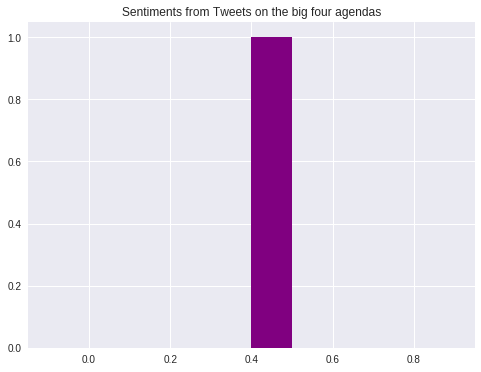

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on the big four agendas")
plt.show()
